In [36]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = None
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import lightgbm as lgb
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import accuracy_score

In [37]:
data = pd.read_csv('NYPD_Shooting_Incident_Data__Historic_.csv')

In [38]:
data.shape

(23585, 19)

In [39]:
data.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,24050482,08/27/2006,05:35:00,BRONX,52,0.0,NaN,True,NaN,NaN,NaN,25-44,F,BLACK HISPANIC,1.017542e+06,255918.875000,40.869058,-73.879632,POINT (-73.87963173099996 40.86905819000003)
1,77673979,03/11/2011,12:03:00,QUEENS,106,0.0,NaN,False,NaN,NaN,NaN,65+,M,WHITE,1.027543e+06,186095.000000,40.677367,-73.843920,POINT (-73.84392019199998 40.677366895000034)
2,203350417,10/06/2019,01:09:00,BROOKLYN,77,0.0,NaN,False,NaN,NaN,NaN,18-24,F,BLACK,9.953250e+05,185155.000000,40.674886,-73.960075,POINT (-73.96007501899999 40.674885741000026)
3,80584527,09/04/2011,03:35:00,BRONX,40,0.0,NaN,False,NaN,NaN,NaN,<18,M,BLACK,1.007453e+06,233952.000000,40.808798,-73.916184,POINT (-73.91618413199996 40.80879780500004)
4,90843766,05/27/2013,21:16:00,QUEENS,100,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1.041267e+06,157133.515625,40.597796,-73.794686,POINT (-73.79468553799995 40.597796249000055)


In [40]:
data['PRECINCT'].value_counts()

75     1375
73     1284
67     1101
79      921
44      841
47      818
46      779
40      759
42      725
81      722
113     721
77      700
43      658
48      638
32      527
71      526
103     523
120     514
52      496
83      439
101     433
70      427
23      418
41      417
105     415
69      406
25      366
60      320
114     316
49      295
90      285
28      280
88      258
63      251
34      232
30      196
33      195
106     185
102     170
100     149
45      148
115     146
76      145
110     137
61      130
26      129
50      127
84      102
121      98
109      98
9        94
72       91
24       89
7        86
104      85
107      79
94       68
62       61
122      58
10       58
78       54
13       52
108      50
5        48
66       41
20       32
14       30
68       27
18       26
123      26
6        24
1        22
112      19
19       11
111       6
17        6
22        1
Name: PRECINCT, dtype: int64

In [41]:
data['OCCUR_DATE'] = pd.to_datetime(data['OCCUR_DATE'])

In [42]:
data.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,24050482,2006-08-27,05:35:00,BRONX,52,0.0,NaN,True,NaN,NaN,NaN,25-44,F,BLACK HISPANIC,1.017542e+06,255918.875000,40.869058,-73.879632,POINT (-73.87963173099996 40.86905819000003)
1,77673979,2011-03-11,12:03:00,QUEENS,106,0.0,NaN,False,NaN,NaN,NaN,65+,M,WHITE,1.027543e+06,186095.000000,40.677367,-73.843920,POINT (-73.84392019199998 40.677366895000034)
2,203350417,2019-10-06,01:09:00,BROOKLYN,77,0.0,NaN,False,NaN,NaN,NaN,18-24,F,BLACK,9.953250e+05,185155.000000,40.674886,-73.960075,POINT (-73.96007501899999 40.674885741000026)
3,80584527,2011-09-04,03:35:00,BRONX,40,0.0,NaN,False,NaN,NaN,NaN,<18,M,BLACK,1.007453e+06,233952.000000,40.808798,-73.916184,POINT (-73.91618413199996 40.80879780500004)
4,90843766,2013-05-27,21:16:00,QUEENS,100,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1.041267e+06,157133.515625,40.597796,-73.794686,POINT (-73.79468553799995 40.597796249000055)


In [43]:
data.isnull().sum()

INCIDENT_KEY                   0
OCCUR_DATE                     0
OCCUR_TIME                     0
BORO                           0
PRECINCT                       0
JURISDICTION_CODE              2
LOCATION_DESC              13581
STATISTICAL_MURDER_FLAG        0
PERP_AGE_GROUP              8295
PERP_SEX                    8261
PERP_RACE                   8261
VIC_AGE_GROUP                  0
VIC_SEX                        0
VIC_RACE                       0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
Lon_Lat                        0
dtype: int64

In [44]:
data.drop(['Lon_Lat', 'Y_COORD_CD', 'X_COORD_CD'], axis = 1, inplace = True)

In [45]:
data['PERP_AGE_GROUP'].value_counts()

18-24      5508
25-44      4714
UNKNOWN    3148
<18        1368
45-64       495
65+          54
1020          1
940           1
224           1
Name: PERP_AGE_GROUP, dtype: int64

In [46]:
values = ['1020','940','224']
data = data[~data['PERP_AGE_GROUP'].isin(values)]
data.shape

(23582, 16)

In [47]:
data['JURISDICTION_CODE'].value_counts()
data.dropna(subset=['JURISDICTION_CODE'], inplace=True)
data.shape

(23580, 16)

In [48]:
data['VIC_RACE'].value_counts()

BLACK                             16867
WHITE HISPANIC                     3447
BLACK HISPANIC                     2245
WHITE                               620
ASIAN / PACIFIC ISLANDER            327
UNKNOWN                              65
AMERICAN INDIAN/ALASKAN NATIVE        9
Name: VIC_RACE, dtype: int64

In [49]:
data = data.sort_values(by=['OCCUR_DATE'])
#data.head()
X=data.loc[:,['INCIDENT_KEY','Latitude','Longitude']]
X.head()

,INCIDENT_KEY,Latitude,Longitude
16838,139716503,40.672154,-73.956052
20697,9953248,40.682397,-73.840081
14553,9953246,40.835990,-73.916276
21448,9953250,40.774861,-73.933833
20896,9953250,40.774861,-73.933833


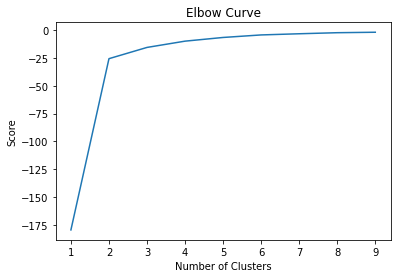

In [50]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = data[['Latitude']]
X_axis = data[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [51]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head()

,INCIDENT_KEY,Latitude,Longitude,cluster_label
16838,139716503,40.672154,-73.956052,1
20697,9953248,40.682397,-73.840081,2
14553,9953246,40.835990,-73.916276,0
21448,9953250,40.774861,-73.933833,0
20896,9953250,40.774861,-73.933833,0


In [52]:
X['cluster_label'].value_counts()

1    10922
0     9771
2     2887
Name: cluster_label, dtype: int64

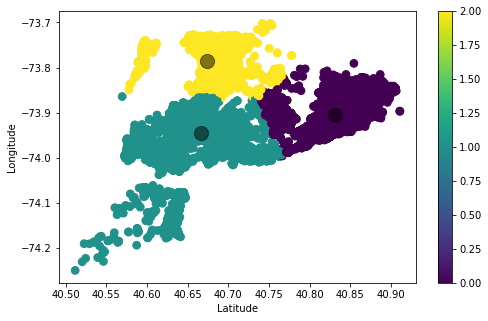

In [53]:
fig, ax = plt.subplots()
X.plot(kind='scatter', x='Latitude', y='Longitude', s=60, c=labels, cmap='viridis',figsize=(8,5), ax=ax) 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [54]:
clustered_data = data.merge(X, left_on='INCIDENT_KEY', right_on='INCIDENT_KEY')
clustered_data.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude_x,Longitude_x,Latitude_y,Longitude_y,cluster_label
0,139716503,2006-01-01,12:30:00,BROOKLYN,77,0.0,PVT HOUSE,True,NaN,NaN,NaN,25-44,M,BLACK,40.672154,-73.956052,40.672154,-73.956052,1
1,9953248,2006-01-01,19:00:00,QUEENS,106,0.0,NONE,False,18-24,M,BLACK,18-24,M,BLACK,40.682397,-73.840081,40.682397,-73.840081,2
2,9953246,2006-01-01,05:51:00,BRONX,44,0.0,NONE,False,25-44,M,WHITE HISPANIC,18-24,M,WHITE HISPANIC,40.835990,-73.916276,40.835990,-73.916276,0
3,9953250,2006-01-01,02:34:00,QUEENS,114,0.0,BAR/NIGHT CLUB,True,25-44,M,BLACK,25-44,M,BLACK,40.774861,-73.933833,40.774861,-73.933833,0
4,9953250,2006-01-01,02:34:00,QUEENS,114,0.0,BAR/NIGHT CLUB,True,25-44,M,BLACK,25-44,M,BLACK,40.774861,-73.933833,40.774861,-73.933833,0


In [55]:
clustered_data.drop(['INCIDENT_KEY', 'Latitude_x','Longitude_x','Latitude_y','Longitude_y'],axis=1, inplace=True)

In [56]:
clustered_data.dtypes

OCCUR_DATE                 datetime64[ns]
OCCUR_TIME                         object
BORO                               object
PRECINCT                            int64
JURISDICTION_CODE                 float64
LOCATION_DESC                      object
STATISTICAL_MURDER_FLAG              bool
PERP_AGE_GROUP                     object
PERP_SEX                           object
PERP_RACE                          object
VIC_AGE_GROUP                      object
VIC_SEX                            object
VIC_RACE                           object
cluster_label                       int32
dtype: object

In [57]:
clustered_data['OCCUR_TIME_CONV'] = pd.to_datetime(clustered_data['OCCUR_TIME'])
clustered_data.head()

,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,cluster_label,OCCUR_TIME_CONV
0,2006-01-01,12:30:00,BROOKLYN,77,0.0,PVT HOUSE,True,NaN,NaN,NaN,25-44,M,BLACK,1,2023-10-16 12:30:00
1,2006-01-01,19:00:00,QUEENS,106,0.0,NONE,False,18-24,M,BLACK,18-24,M,BLACK,2,2023-10-16 19:00:00
2,2006-01-01,05:51:00,BRONX,44,0.0,NONE,False,25-44,M,WHITE HISPANIC,18-24,M,WHITE HISPANIC,0,2023-10-16 05:51:00
3,2006-01-01,02:34:00,QUEENS,114,0.0,BAR/NIGHT CLUB,True,25-44,M,BLACK,25-44,M,BLACK,0,2023-10-16 02:34:00
4,2006-01-01,02:34:00,QUEENS,114,0.0,BAR/NIGHT CLUB,True,25-44,M,BLACK,25-44,M,BLACK,0,2023-10-16 02:34:00


In [58]:
clustered_data['year'] = clustered_data['OCCUR_DATE'].dt.year
clustered_data['month'] = clustered_data['OCCUR_DATE'].dt.month
clustered_data['week'] = clustered_data['OCCUR_DATE'].dt.week
clustered_data['day'] = clustered_data['OCCUR_DATE'].dt.day
clustered_data['hour'] = clustered_data['OCCUR_TIME_CONV'].dt.hour
clustered_data['minutes'] = clustered_data['OCCUR_TIME_CONV'].dt.minute
clustered_data['dayofweek'] = clustered_data['OCCUR_DATE'].dt.dayofweek
clustered_data.head()

,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,cluster_label,OCCUR_TIME_CONV,year,month,week,day,hour,minutes,dayofweek
0,2006-01-01,12:30:00,BROOKLYN,77,0.0,PVT HOUSE,True,NaN,NaN,NaN,25-44,M,BLACK,1,2023-10-16 12:30:00,2006,1,52,1,12,30,6
1,2006-01-01,19:00:00,QUEENS,106,0.0,NONE,False,18-24,M,BLACK,18-24,M,BLACK,2,2023-10-16 19:00:00,2006,1,52,1,19,0,6
2,2006-01-01,05:51:00,BRONX,44,0.0,NONE,False,25-44,M,WHITE HISPANIC,18-24,M,WHITE HISPANIC,0,2023-10-16 05:51:00,2006,1,52,1,5,51,6
3,2006-01-01,02:34:00,QUEENS,114,0.0,BAR/NIGHT CLUB,True,25-44,M,BLACK,25-44,M,BLACK,0,2023-10-16 02:34:00,2006,1,52,1,2,34,6
4,2006-01-01,02:34:00,QUEENS,114,0.0,BAR/NIGHT CLUB,True,25-44,M,BLACK,25-44,M,BLACK,0,2023-10-16 02:34:00,2006,1,52,1,2,34,6


In [59]:
clustered_data.drop(['year', 'minutes', 'OCCUR_TIME_CONV', 'OCCUR_DATE','OCCUR_TIME'],axis=1, inplace=True)

In [60]:
# check = clustered_data.loc[clustered_data['STATISTICAL_MURDER_FLAG'] == True]
# check['minutes'].value_counts()

In [61]:
cats=['BORO', 'LOCATION_DESC', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE']
for cat in cats:
    clustered_data[cat] = clustered_data[cat].astype('category')

In [71]:
y = clustered_data['STATISTICAL_MURDER_FLAG']
cd = clustered_data.copy()
cd.drop(['STATISTICAL_MURDER_FLAG'], axis = 1, inplace = True)
X = cd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [76]:
X.dtypes

BORO                 category
PRECINCT                int64
JURISDICTION_CODE     float64
LOCATION_DESC        category
PERP_AGE_GROUP       category
PERP_SEX             category
PERP_RACE            category
VIC_AGE_GROUP        category
VIC_SEX              category
VIC_RACE             category
cluster_label           int32
month                   int64
week                    int64
day                     int64
hour                    int64
dayofweek               int64
dtype: object

In [73]:
clf = lgb.LGBMClassifier(n_estimators=10000, n_jobs=-1, scale_pos_weight=6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.53%


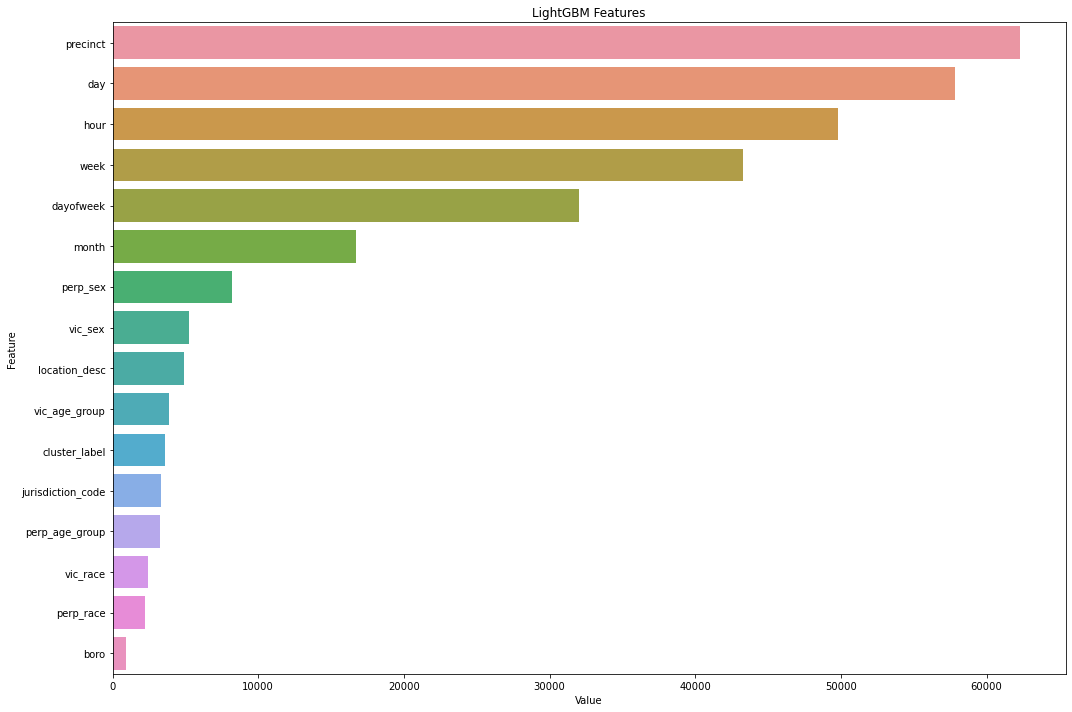

In [74]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,[x.lower() for x in X_train.columns])), columns=['Value','Feature'])
plt.figure(figsize=(15, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.savefig('lgbm_importances_shootings.jpg')
plt.show()

In [75]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


print(f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6268425135764157
              precision    recall  f1-score   support

       False       0.92      0.77      0.84      6493
        True       0.52      0.78      0.63      2068

    accuracy                           0.78      8561
   macro avg       0.72      0.78      0.73      8561
weighted avg       0.82      0.78      0.79      8561



Accuracy: 61.64%


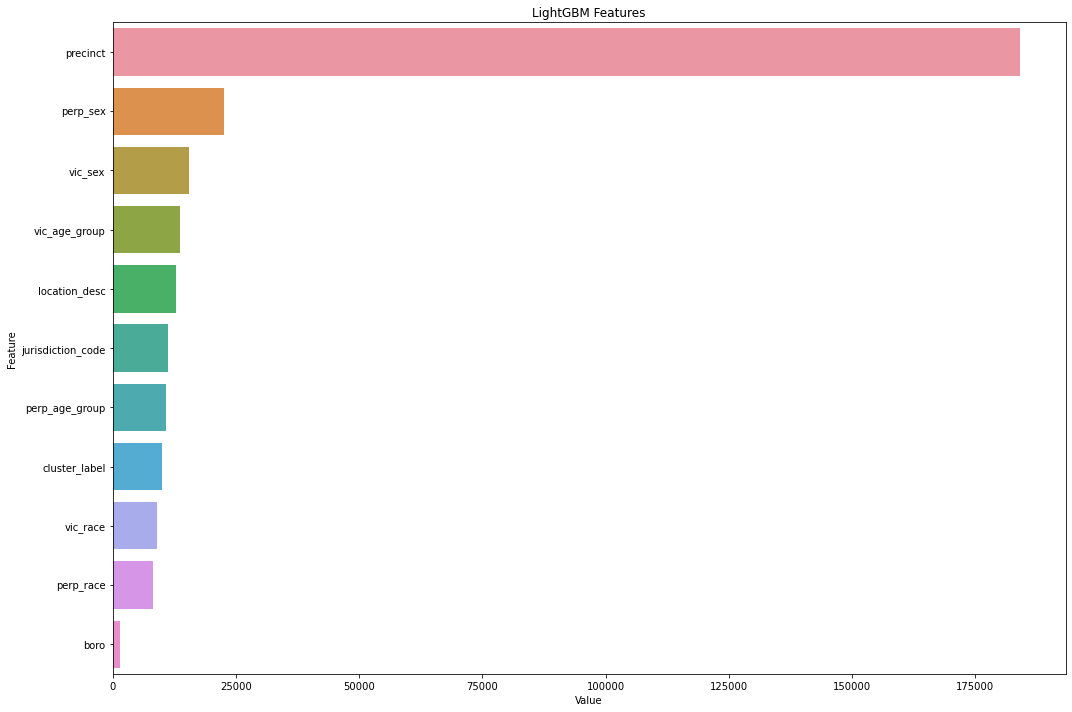

0.5210035005834306
              precision    recall  f1-score   support

       False       0.93      0.54      0.68      6493
        True       0.37      0.86      0.52      2068

    accuracy                           0.62      8561
   macro avg       0.65      0.70      0.60      8561
weighted avg       0.79      0.62      0.64      8561



In [77]:
X_train_no_time = X_train.copy()
X_test_no_time = X_test.copy()



X_train_no_time.drop(['month', 'week', 
          'hour', 'day', 'dayofweek'], axis = 1, inplace = True)
X_test_no_time.drop(['month', 'week', 
          'hour', 'day', 'dayofweek'], axis = 1, inplace = True)


clf = lgb.LGBMClassifier(n_estimators=10000, n_jobs=-1, scale_pos_weight=6)
clf.fit(X_train_no_time, y_train)
y_pred = clf.predict(X_test_no_time)
#predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,[x.lower() for x in X_train_no_time.columns])), columns=['Value','Feature'])
plt.figure(figsize=(15, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
#plt.savefig('lgbm_importances_shootings.jpg')
plt.show()

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


print(f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))